
### REKOMENDASI PRODUK


In [1]:
# Import library 
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv('Fashion_Retail_Sales.csv')

### Exploratory Data Analysis

In [3]:
# Menampilkan 5 data teratas dari dataset
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


In [4]:
# Mengecek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


Dataset terdiri dari 3.400 baris data dan 6 kolom dengan rincian:

- Customer Reference ID: Berisi ID pelanggan unik dengan tipe data integer.
- Item Purchased: Berisi informasi tentang barang yang dibeli dengan tipe data object.
- Purchase Amount (USD): Berisi jumlah pembelian dalam satuan dolar AS dengan tipe data float.
- Date of Purchase: Berisi tanggal pembelian dengan tipe data object.
- Review Rating: Berisi penilaian atau ulasan pelanggan dalam bentuk angka desimal dengan tipe data float.
- Payment Method: Berisi metode pembayaran yang digunakan pelanggan dengan tipe data object.

In [5]:
# Mengecek nilai yang hilang
df.isna().sum()

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

Hasil analisis data menunjukkan ada nilai yang hilang pada beberapa kolom, yaitu:

- Purchase Amount (USD) memiliki 650 data yang tidak terisi.
- Review Rating memiliki 324 data yang kosong.

In [6]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

Dataset ini tidak mengandung data duplikat.

### Preprocessing

In [7]:
# Mengisi nilai yang hilang pada kolom 'Review Rating' dengan rata-rata
df['Review Rating'].fillna(df['Review Rating'].mean(), inplace=True)
df['Purchase Amount (USD)'].fillna(df['Purchase Amount (USD)'].mean(), inplace=True)

In [8]:
# Mengecek kembali nilai yang hilang
df.isna().sum()

Customer Reference ID    0
Item Purchased           0
Purchase Amount (USD)    0
Date Purchase            0
Review Rating            0
Payment Method           0
dtype: int64

In [9]:
# Membuat pivot tabel
user = df.pivot_table(index='Customer Reference ID', columns='Item Purchased', values='Review Rating', fill_value=0)

Pivot table digunakan untuk merepresentasikan hubungan antara pelanggan (dengan ID sebagai baris) dan item yang dibeli (sebagai kolom), menggunakan nilai Review Rating sebagai isi tabel.

In [10]:
# Melihat isi tabel
user.head()


Item Purchased,Backpack,Belt,Blazer,Blouse,Boots,Bowtie,Camisole,Cardigan,Coat,Dress,...,Swimsuit,T-shirt,Tank Top,Tie,Trench Coat,Trousers,Tunic,Umbrella,Vest,Wallet
Customer Reference ID,,,,,,,,,,,,,,,,,,,,,
3957,4.0,0.0,0.0,2.100000,0.0,0.0,4.700000,0.0,2.1,0.0,...,0.0,0.0,2.1,0.0,0.00,0.0,0.0,0.0,3.200000,0.0
3958,0.0,2.7,0.0,3.300000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,3.1,2.8,3.85,2.5,1.1,2.5,0.000000,0.0
3959,0.0,0.0,1.8,0.000000,4.2,0.0,1.600000,0.0,2.5,0.0,...,0.0,0.0,0.0,0.0,0.00,4.5,0.0,3.9,0.000000,0.0
3960,0.0,0.0,0.0,0.000000,0.0,0.0,3.366667,0.0,0.0,0.0,...,0.0,0.0,4.6,0.0,0.00,1.5,0.0,0.0,4.900000,4.0
3961,0.0,0.0,0.0,2.999057,1.2,0.0,0.000000,0.0,0.0,0.0,...,2.3,0.0,0.0,0.0,0.00,2.1,0.0,0.0,2.449529,3.3


### Visualisasi Data

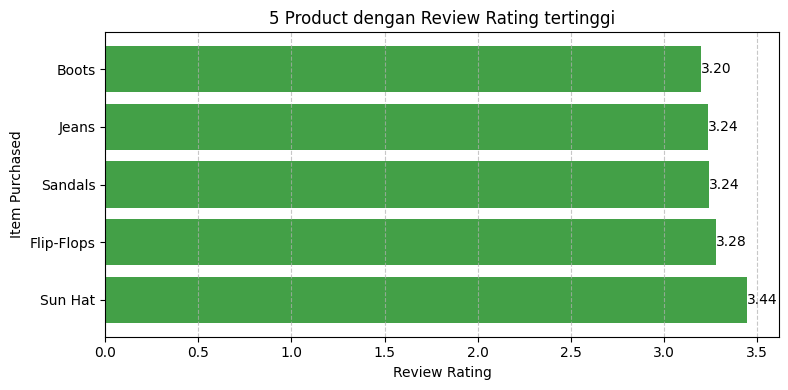

In [11]:
# Melihat product dengan review tertinggi
top_items = df.groupby('Item Purchased')['Review Rating'].mean().reset_index()
top_items = top_items.sort_values(by='Review Rating', ascending=False).head(5)

plt.figure(figsize=(8, 4))
plt.barh(top_items['Item Purchased'], top_items['Review Rating'], color='#43A047')

plt.xlabel('Review Rating')
plt.ylabel('Item Purchased')
plt.title('5 Product dengan Review Rating tertinggi')

for index, value in enumerate(top_items['Review Rating']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


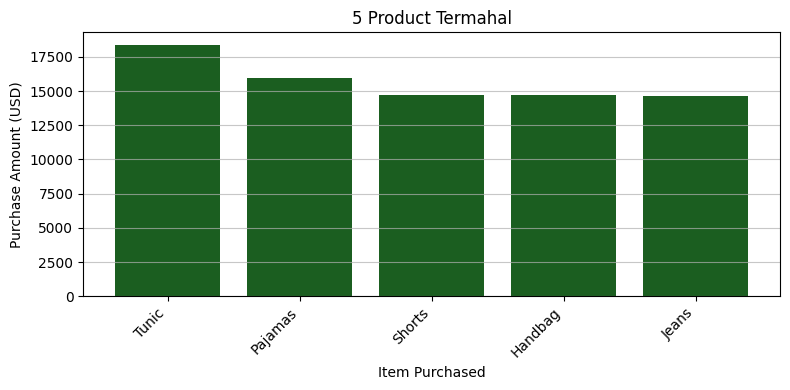

In [12]:
# Melihat product dengan harga termahal
item_prices = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()
top_5_expensive_items = item_prices.sort_values(by='Purchase Amount (USD)', ascending=False).head(5)

plt.figure(figsize=(8, 4))
plt.bar(top_5_expensive_items['Item Purchased'], top_5_expensive_items['Purchase Amount (USD)'], color='#1B5E20')

plt.xlabel('Item Purchased')
plt.ylabel('Purchase Amount (USD)')
plt.title('5 Product Termahal')

plt.grid(True, axis='y', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Cosine Similarity

In [13]:
# Mengaplikasikan cosine similarity
user_similarity = cosine_similarity(user)
user_similarity_df = pd.DataFrame(user_similarity, index=user.index, columns=user.index)

Cosine similarity digunakan untuk menghitung tingkat kemiripan antar pengguna dalam dataset berdasarkan data yang diberikan. Hasil dari cosine similarity digunakan untuk collaborative filtering, dimana sistem akan merekomendasikan barang berdasarkan preferensi pengguna yang mirip.

In [14]:
# Membuat fungsi untuk memberikan rekomendasi produk kepada pengguna
def recommend(user_id, top_n=3):
    if user_id not in user.index:
        return ["User tidak ditemukan. Pastikan ID user sudah benar."]
    
    # Mencari pengguna yang mirip
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:top_n+1].index
    
    # Mengambil produk yang telah dinilai pengguna serupa
    recommended_products = []
    for similar_user in similar_users:
        similar_user_rated = df[df['Customer Reference ID'] == similar_user][['Item Purchased', 'Review Rating']]
        recommended_products.extend(similar_user_rated.to_dict('records'))
    
    # Memfilter produk yang belum dinilai oleh user_id
    user_rated = set(df[df['Customer Reference ID'] == user_id]['Item Purchased'])
    final_recommendations = [prod for prod in recommended_products if prod['Item Purchased'] not in user_rated]
    
    # Mengurutkan berdasarkan rating
    final_recommendations = sorted(final_recommendations, key=lambda x: x['Review Rating'], reverse=True)
    
    return final_recommendations[:top_n]

Fungsi recommend digunakan untuk memberikan rekomendasi produk kepada pengguna dengan mempertimbangkan kesamaan preferensi dengan pengguna lainnya. Fungsi ini menerapkan teknik collaborative filtering berbasis pengguna, di mana rekomendasi didasarkan pada kemiripan antar pengguna berdasarkan rating yang diberikan pada produk.

In [15]:
# User id yg dapat anda pilih
df['Customer Reference ID']

0       4018
1       4115
2       4019
3       4097
4       3997
        ... 
3395    4118
3396    4056
3397    3991
3398    4042
3399    4001
Name: Customer Reference ID, Length: 3400, dtype: int64

In [16]:
# Masukkan user id yang ingin Anda periksa rekomendasinya
user_id = 4115
recommendations = recommend(user_id=user_id, top_n=3)

# Menampilkan rekomendasi
print('Rekomendasi')
for idx, rec in enumerate(recommendations, start=1):
    print(f"{rec['Item Purchased']} - (Review Rating: {rec['Review Rating']})")

Rekomendasi
Wallet - (Review Rating: 4.6)
Cardigan - (Review Rating: 4.5)
Bowtie - (Review Rating: 4.4)


Pada sistem rekomendasi, pengguna akan memasukkan user_id yang terdaftar dalam indeks. Setelah itu, sistem akan menampilkan 3 rekomendasi produk teratas untuk pengguna tersebut, yang dihitung berdasarkan riwayat pembeliannya.

## THANK YOU